In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


In [2]:
df=pd.read_csv('zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
pd.DataFrame(round(df.isnull().sum()/df.shape[0] * 100,3), columns = ['Missing'])

,Missing
url,0.000
address,0.000
name,0.000
online_order,0.000
book_table,0.000
rate,15.034
votes,0.000
phone,2.336
location,0.041
rest_type,0.439


In [6]:
df.drop(['url', 'address', 'phone'], axis=1, inplace = True)

In [7]:
df.rename(columns = {"approx_cost(for two people)" : "cost_two", "listed_in(type)" : "service_type", "listed_in(city)" : "serve_to"},
          inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   dish_liked    23639 non-null  object
 8   cuisines      51672 non-null  object
 9   cost_two      51371 non-null  object
 10  reviews_list  51717 non-null  object
 11  menu_item     51717 non-null  object
 12  service_type  51717 non-null  object
 13  serve_to      51717 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.5+ MB


In [9]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost_two', 'reviews_list',
       'menu_item', 'service_type', 'serve_to'],
      dtype='object')

# Exploratory Data Analysis

In [10]:
# Converting the cost_two variaible into integer
df.cost_two = df.cost_two.astype(str)
df.cost_two = df.cost_two.apply(lambda x : x.replace(',','')).astype(float)

In [11]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
df['rate'] = df.rate.replace('NEW', np.NaN)
df['rate'] = df.rate.replace('-', np.NaN)
df.rate = df.rate.astype(str)

In [13]:
df.rate = df.rate.apply(lambda x : x.replace('/5','')).astype(float)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


<Figure size 1400x1000 with 0 Axes>

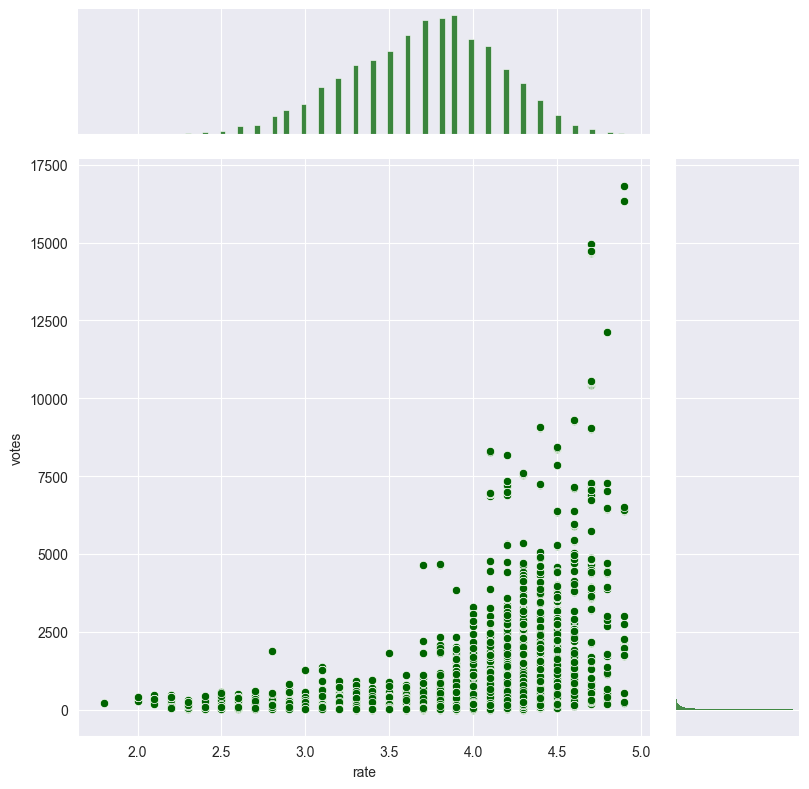

In [14]:
plt.figure(figsize=(14,10))
sns.set_style("darkgrid")
sns.jointplot(x = 'rate', y = 'votes', data=df, color = 'darkgreen',height = 8, ratio = 4)

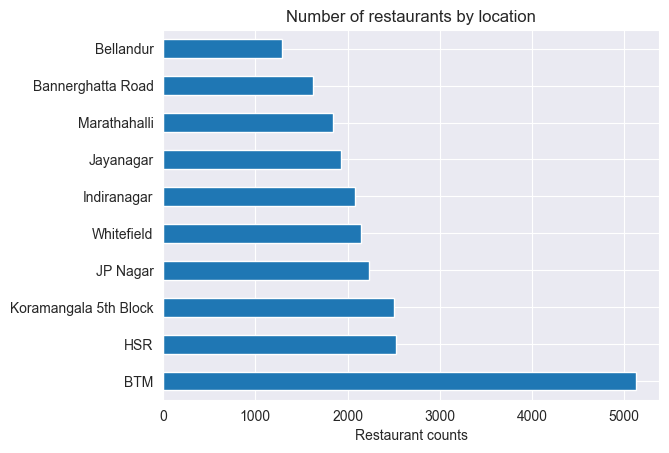

In [15]:
# Analyzing the number of locations with respect to the location

df.location.value_counts().nlargest(10).plot(kind='barh')
plt.title("Number of restaurants by location")
plt.xlabel("Restaurant counts")
plt.show()

In [16]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost_two', 'reviews_list',
       'menu_item', 'service_type', 'serve_to'],
      dtype='object')

In [17]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [18]:
# Plotting a pie chart for online orders

trace = go.Pie(labels = ['Online_orders', 'No_online_orders'], values = df['online_order'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of order variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [19]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


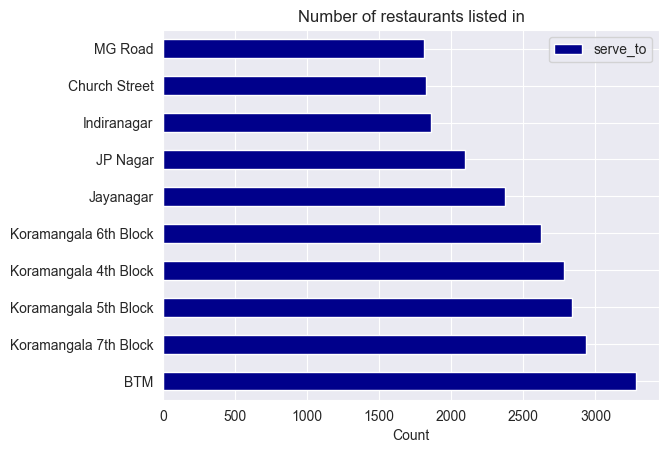

In [20]:
# Restaurants to serve to

df.serve_to.value_counts().nlargest(10).plot(kind = 'barh', color = 'darkblue')
plt.title("Number of restaurants listed in")
plt.xlabel("Count")
plt.legend()
plt.show()

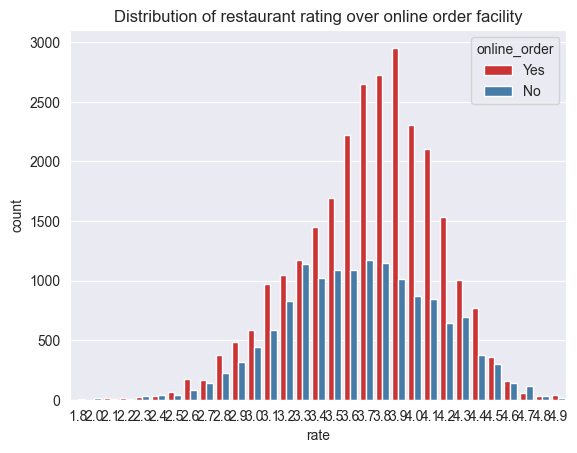

In [21]:
sns.countplot(x = df['rate'], hue = df['online_order'], palette= 'Set1')
plt.title("Distribution of restaurant rating over online order facility")
plt.show()

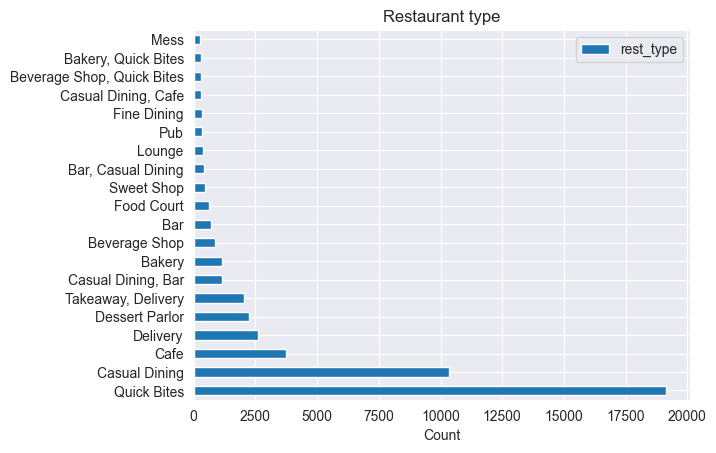

In [22]:
df.rest_type.value_counts().nlargest(20).plot(kind = 'barh')
plt.title("Restaurant type")
plt.xlabel("Count")
plt.legend()
plt.show()

In [23]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


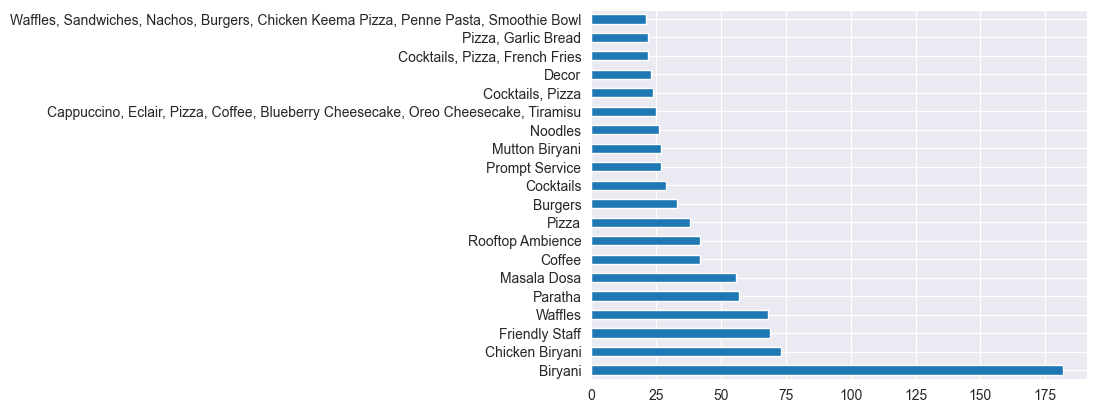

In [24]:
df.dish_liked.value_counts().nlargest(20).plot(kind = 'barh')
plt.show()

In [25]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


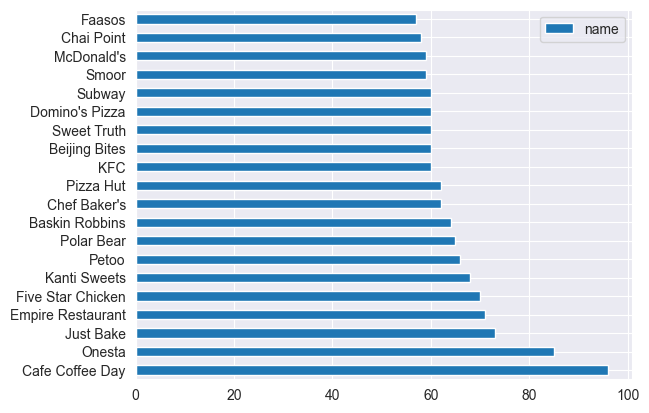

In [26]:
df.name.value_counts().nlargest(20).plot(kind = 'barh')
plt.legend()
plt.show()

In [27]:
# Plotting a pie chart for online orders

trace = go.Pie(labels = ['Table_booking_available', 'No_table_booking_available'], values = df['book_table'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of order variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

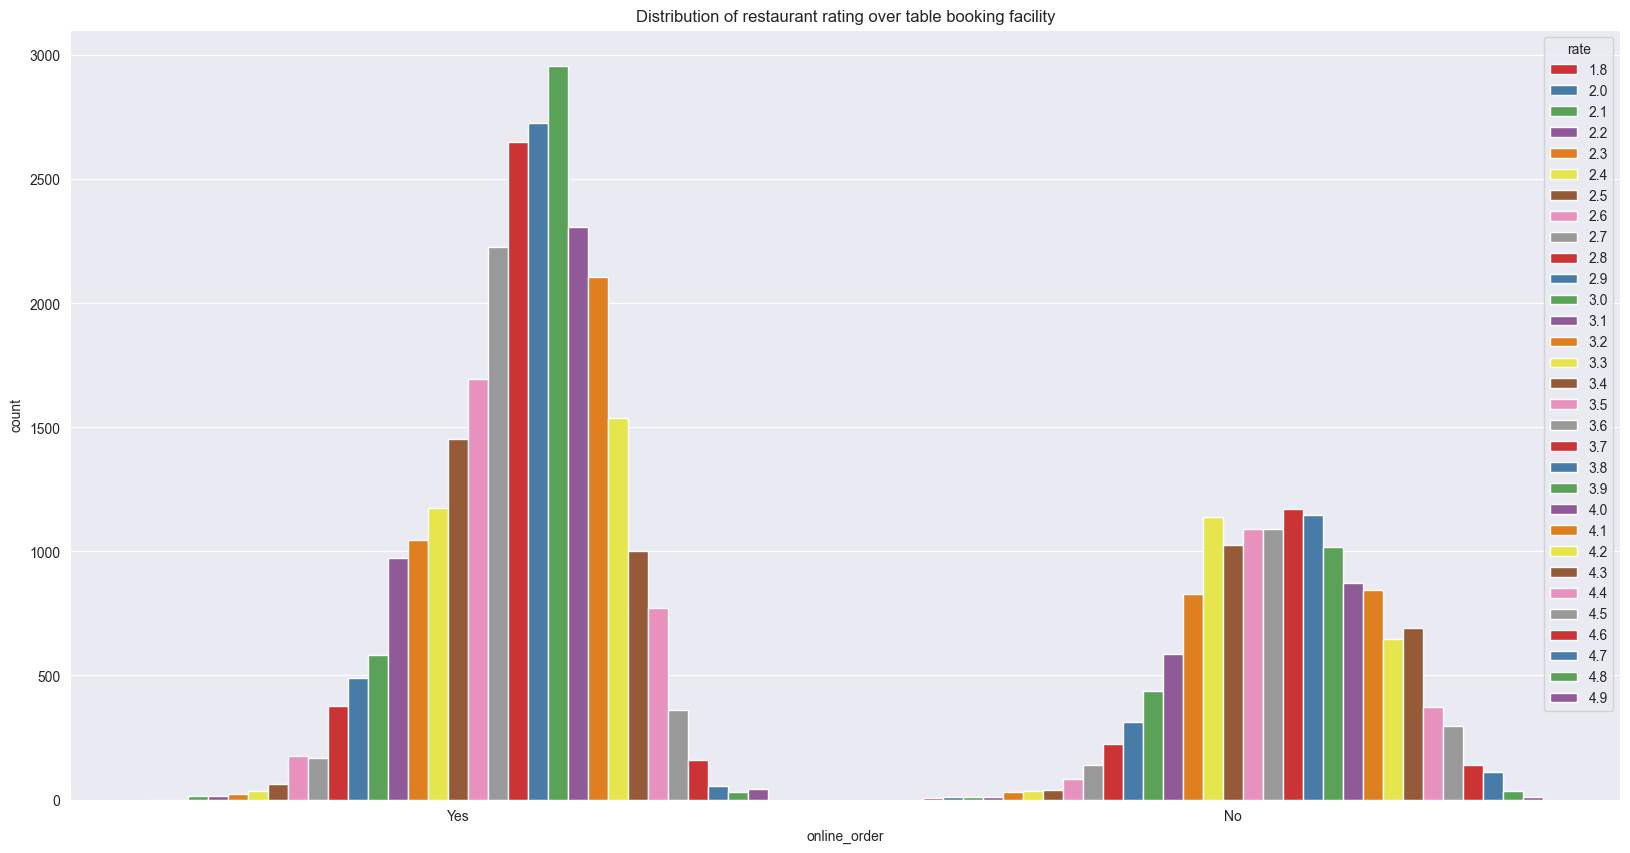

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(x = df['online_order'], hue = df['rate'], palette= 'Set1')
plt.title("Distribution of restaurant rating over table booking facility")
plt.show()

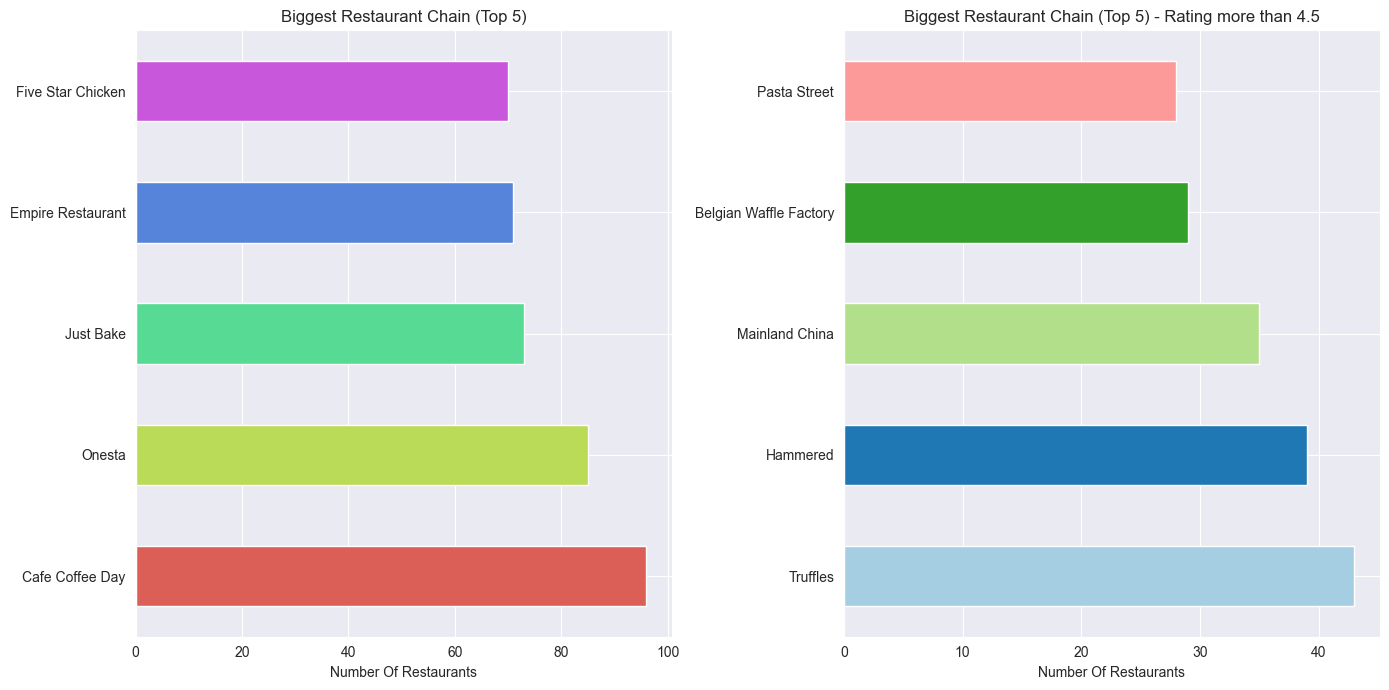

In [29]:
plt.rcParams['figure.figsize'] = 14,7
plt.subplot(1,2,1)

df.name.value_counts().head().plot(kind = 'barh', color = sns.color_palette("hls", 5))
plt.xlabel("Number Of Restaurants")
plt.title("Biggest Restaurant Chain (Top 5)")

plt.subplot(1,2,2)

df[df['rate'] >= 4.5]['name'].value_counts().nlargest(5).plot(kind = 'barh', color = sns.color_palette("Paired"))
plt.xlabel("Number Of Restaurants")
plt.title("Biggest Restaurant Chain (Top 5) - Rating more than 4.5")
plt.tight_layout()

In [30]:
# checking for null values
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
dish_liked      28078
cuisines           45
cost_two          346
reviews_list        0
menu_item           0
service_type        0
serve_to            0
dtype: int64

In [31]:
# Replacing the NaN values in rate feature

df['rate'] = df['rate'].fillna(df['rate'].mean())

C:\Users\urmi.pandya\.conda\envs\greykite\lib\site-packages\ipykernel_launcher.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




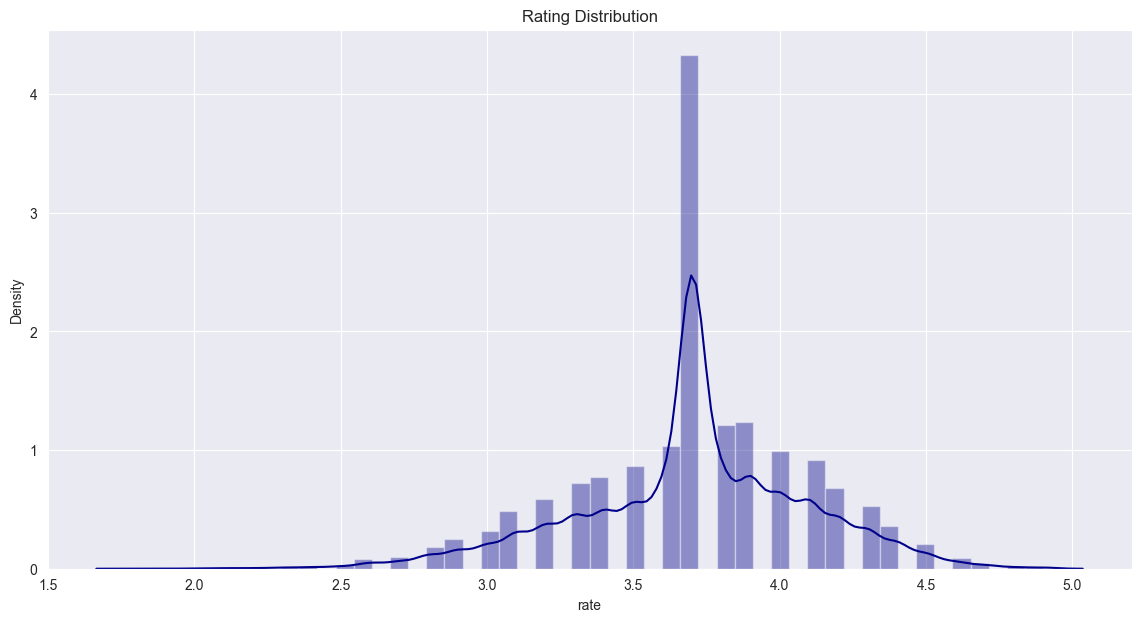

In [32]:
# Plotting a distplot
sns.distplot(df['rate'], color = 'darkblue')
plt.title('Rating Distribution')
plt.show()

In [33]:
# Replacing the NaN values for cost_two

df.cost_two.value_counts().mean()

733.8714285714286

In [34]:
# Replacing the NaN values for the cost_two feature with mean value

df['cost_two'] = df['cost_two'].fillna(df['cost_two'].mean())

C:\Users\urmi.pandya\.conda\envs\greykite\lib\site-packages\ipykernel_launcher.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




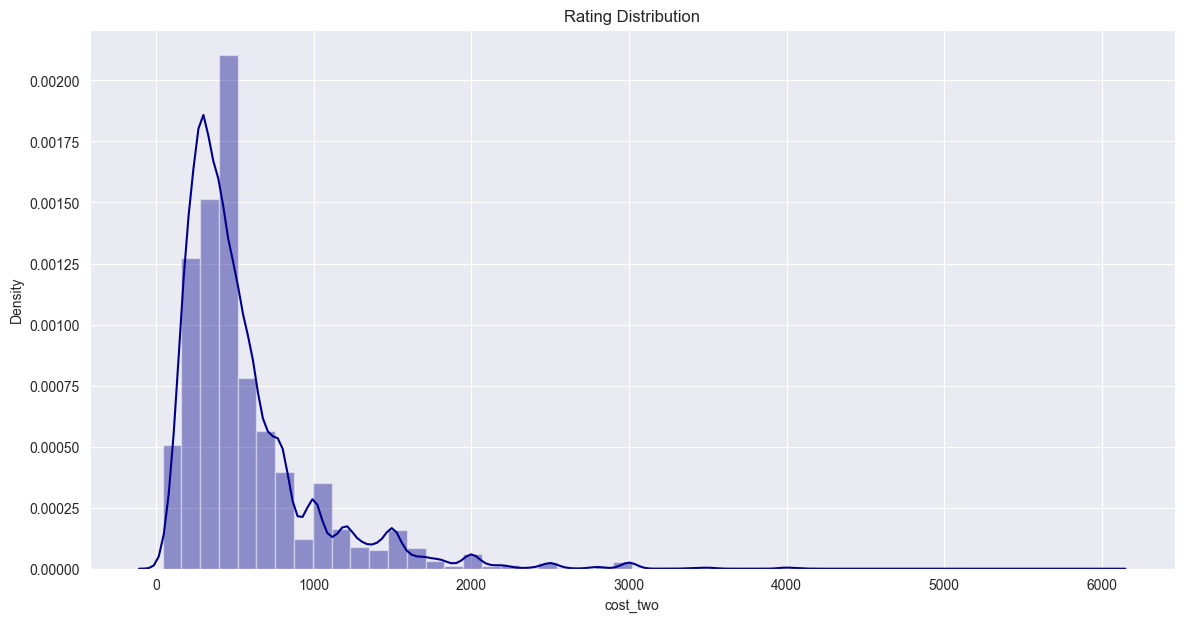

In [35]:
# Plotting a distplot for cost_two feature
sns.distplot(df['cost_two'], color = 'darkblue')
plt.title('Rating Distribution')
plt.show()

In [36]:
df['online_order'] = pd.get_dummies(df['online_order'], drop_first=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [37]:
df['book_table'] = pd.get_dummies(df['book_table'], drop_first=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [38]:
# Performing One Hot Encoding on rest_type

get_dummies_rest_type = pd.get_dummies(df.rest_type)
get_dummies_rest_type.head(3)

,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court","Bakery, Kiosk","Bakery, Quick Bites","Bakery, Sweet Shop",Bar,"Bar, Cafe",...,"Quick Bites, Food Court","Quick Bites, Kiosk","Quick Bites, Meat Shop","Quick Bites, Mess","Quick Bites, Sweet Shop",Sweet Shop,"Sweet Shop, Dessert Parlor","Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Performing One Hot Encoding on location

get_dummies_location = pd.get_dummies(df.location)
get_dummies_location.head(3)

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Performing One Hot Encoding on type

get_dummies_service_type = pd.get_dummies(df.service_type)
get_dummies_service_type.head(3)

,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0


In [41]:
# Concatinating the dataframes
final_df = pd.concat([df,get_dummies_rest_type,get_dummies_service_type, get_dummies_location], axis = 1)
final_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
final_df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
final_df = final_df.drop(["name","rest_type","location", 'cuisines', 'dish_liked', 'reviews_list'],axis = 1)
final_df.head()

,online_order,book_table,rate,votes,cost_two,menu_item,service_type,serve_to,Bakery,"Bakery, Beverage Shop",...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,1,1,4.1,775,800.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,800.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,800.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,300.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,600.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
final_df.head()

,online_order,book_table,rate,votes,cost_two,menu_item,service_type,serve_to,Bakery,"Bakery, Beverage Shop",...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,1,1,4.1,775,800.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,800.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,800.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,300.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,600.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
final_df = final_df.drop(["menu_item","service_type","serve_to"],axis = 1)
final_df.head()

,online_order,book_table,rate,votes,cost_two,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court",...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,1,1,4.1,775,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,300.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

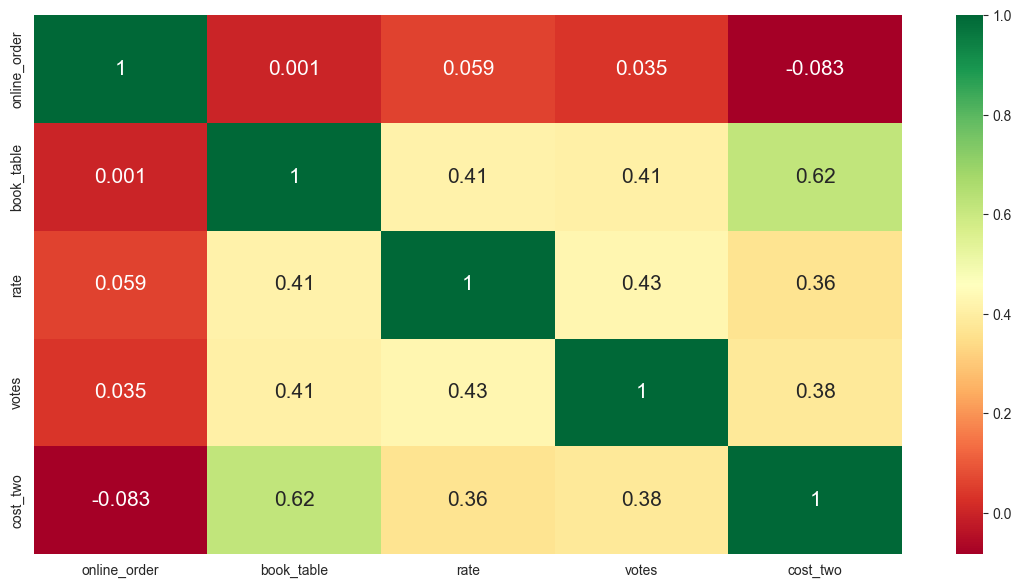

In [46]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [47]:
# Splitting the features into independent and dependent variables

x = final_df.drop(['rate'], axis = 1)
x.head()

,online_order,book_table,votes,cost_two,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court","Bakery, Kiosk",...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,1,1,775,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,787,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,918,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,88,300.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,166,600.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
y = final_df['rate']

In [49]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [50]:
print(model.feature_importances_)

[ 2.47041936e-02  1.60344669e-01  3.58307257e-01  1.01992792e-01
  1.95106466e-03  1.50935857e-07  5.87063715e-04  7.39003375e-04
  4.98374300e-05  4.49871952e-07  2.19197692e-03  3.96886052e-18
  2.49248495e-03  6.90337929e-06  1.22726422e-03  6.30637052e-06
  1.10970743e-04  1.81580665e-05  2.03767323e-03  4.45434371e-05
  4.46860136e-04  9.02753882e-04  6.18700918e-07  1.01672399e-02
  6.53948393e-04  7.08119568e-05  1.18272245e-03  1.82558594e-03
  2.92193852e-05  4.82097381e-05  4.02572698e-04  1.28727347e-02
  2.87623792e-03  7.66562714e-04  2.87432502e-06  8.42997284e-05
  1.05693366e-04  1.17120668e-04  1.26534723e-06  3.43705083e-05
  1.57105263e-04  3.07268913e-06  1.83542050e-05  5.18064893e-03
  1.27786936e-02  1.91884709e-04  3.88995391e-04  1.97264021e-03
  3.81334075e-06  8.91987149e-05  9.34791960e-04  1.88875393e-05
  1.89155506e-04  6.88752091e-04  3.76002882e-05  4.76241401e-07
  3.11817544e-06  3.16688333e-03  1.44808939e-06  9.80494174e-05
  7.28273740e-06  6.89995

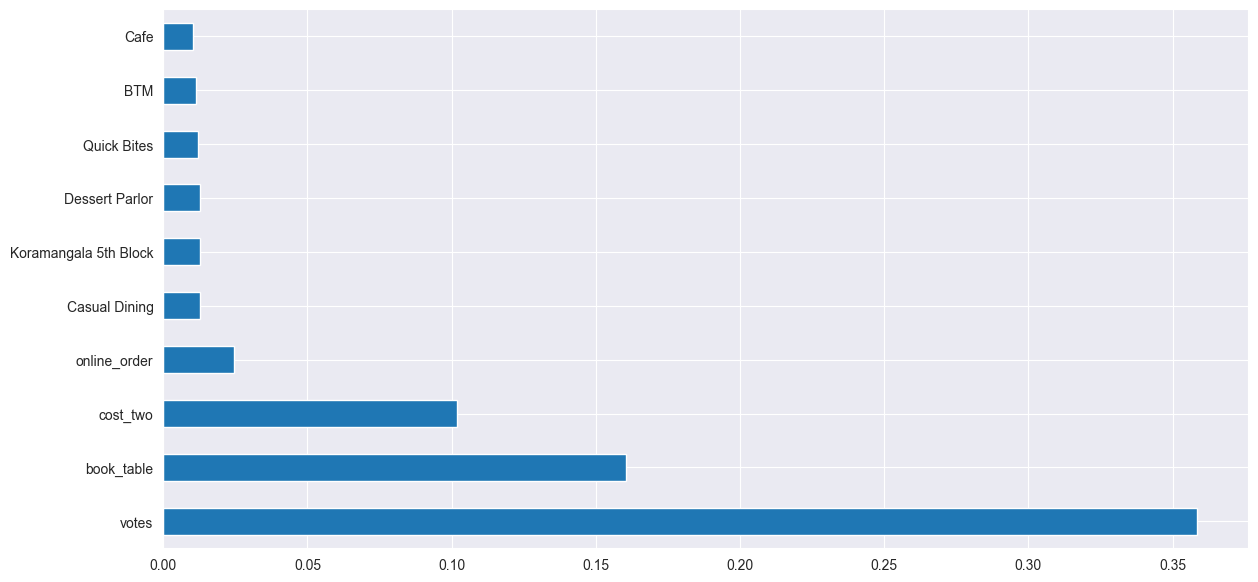

In [51]:
#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

C:\Users\urmi.pandya\.conda\envs\greykite\lib\site-packages\ipykernel_launcher.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot:xlabel='rate', ylabel='Density'>

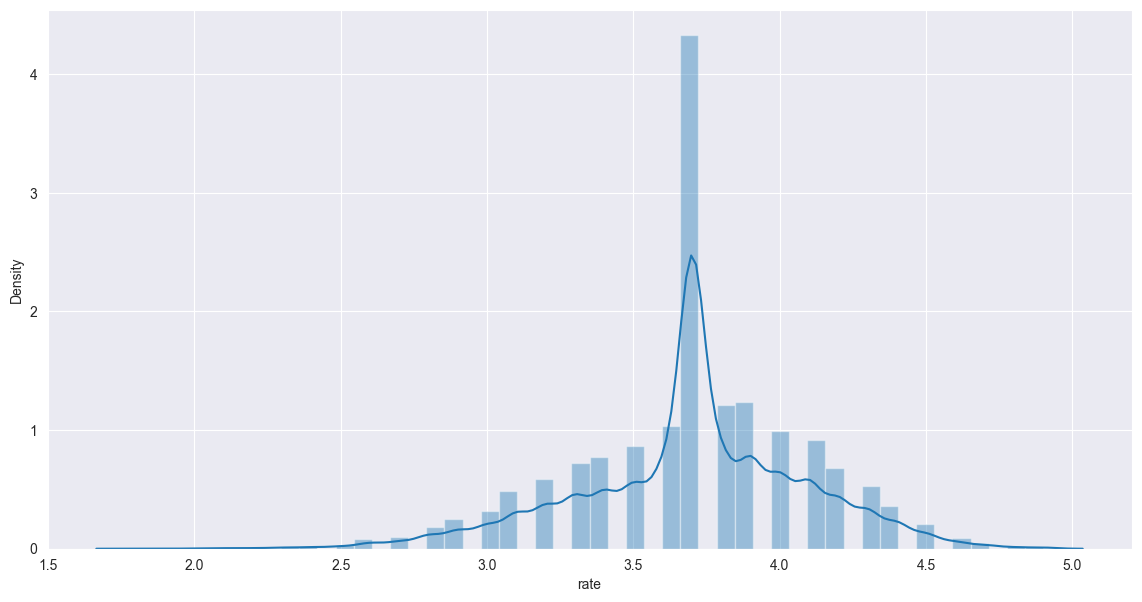

In [52]:
sns.distplot(df['rate'])

In [53]:
#Spliting data into test and train

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [54]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

In [55]:
r2 = r2_score(y_test,lr_pred)
print('R-Square Score: ',r2*100)

R-Square Score:  32.872936492120154


In [56]:
# Calculate the absolute errors
lr_errors = abs(lr_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(lr_pred), 2), 'degrees.')

Mean Absolute Error: 3.7 degrees.


In [57]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (lr_errors / y_test)
# Calculate and display accuracy
lr_accuracy = 100 - np.mean(mape)
print('Accuracy for Logistic Regression is :', round(lr_accuracy, 2), '%.')

Accuracy for Logistic Regression is : 92.97 %.


C:\Users\urmi.pandya\.conda\envs\greykite\lib\site-packages\ipykernel_launcher.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot:xlabel='rate', ylabel='Density'>

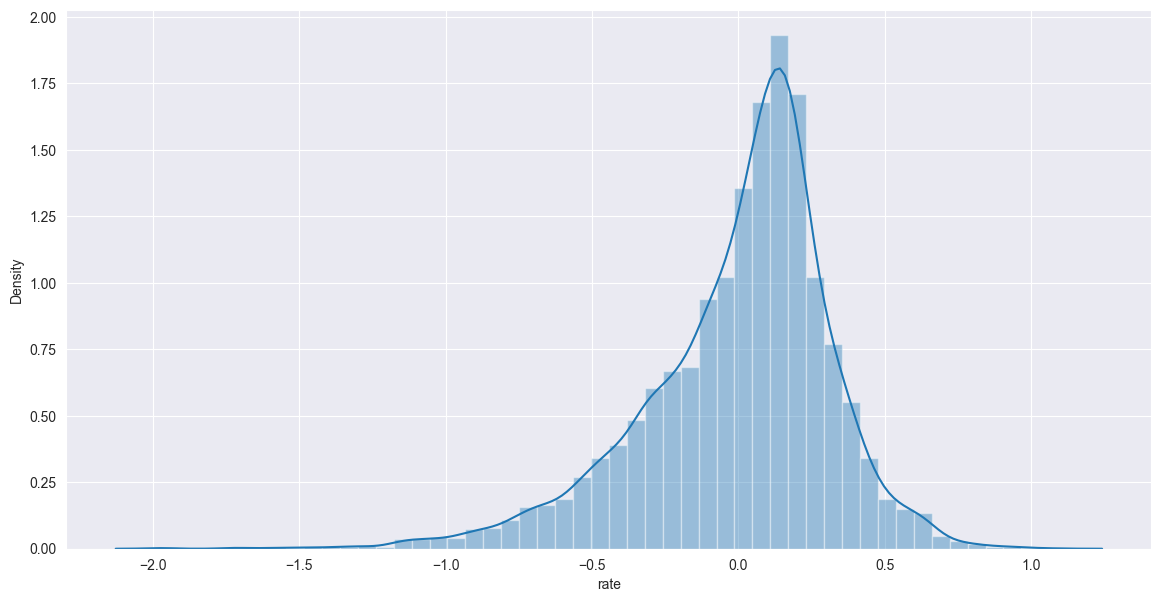

In [58]:
sns.distplot(y_test-lr_pred)

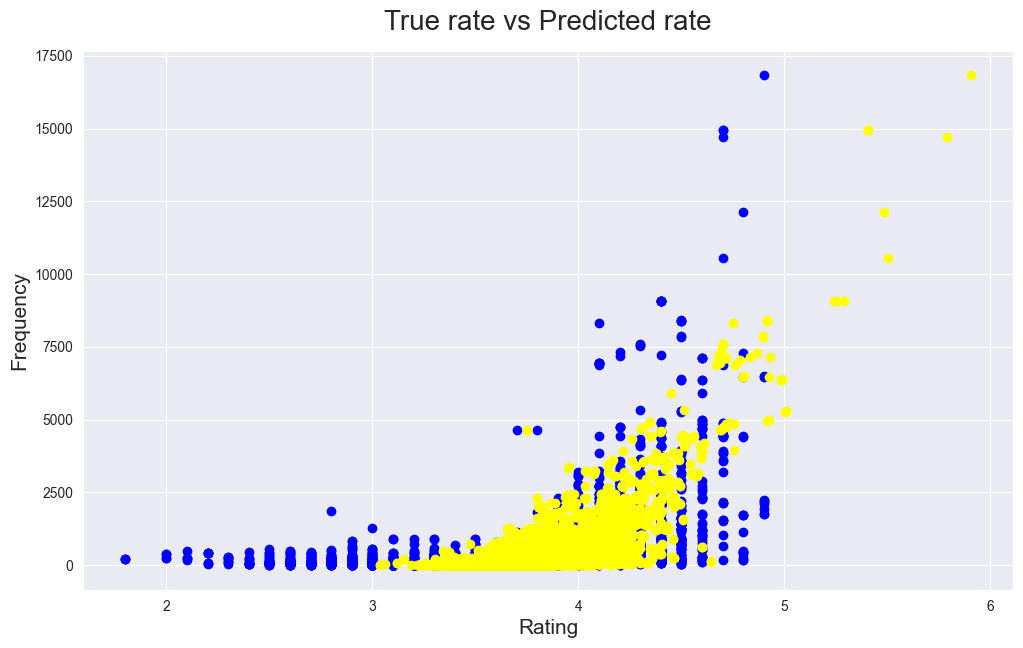

In [59]:
#plotting the Random forest values predicated Rating

plt.figure(figsize=(12,7))

plt.scatter(y_test,x_test.iloc[:,2],color="blue")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(lr_pred,x_test.iloc[:,2],color="yellow")

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [61]:
print('mse:',metrics.mean_squared_error(y_test, lr_pred))
print('mae:',metrics.mean_absolute_error(y_test, lr_pred))

mse: 0.10501941314193321
mae: 0.24488788137456727


In [62]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(criterion='mse')
dtree.fit(x_train, y_train)

C:\Users\urmi.pandya\.conda\envs\greykite\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



DecisionTreeRegressor(criterion='mse')

In [63]:
dtree_pred = dtree.predict(x_test)

In [64]:
r2 = r2_score(y_test,dtree_pred)
print('R-Square Score: ',r2*100)

# Calculate the absolute errors
dtree_errors = abs(dtree_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(dtree_pred), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (dtree_errors / y_test)
# Calculate and display accuracy
dtree_accuracy = 100 - np.mean(mape)
print('Accuracy for Decision tree regressor is :', round(dtree_accuracy, 2), '%.')

R-Square Score:  86.04178278510797
Mean Absolute Error: 3.7 degrees.
Accuracy for Decision tree regressor is : 98.84 %.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


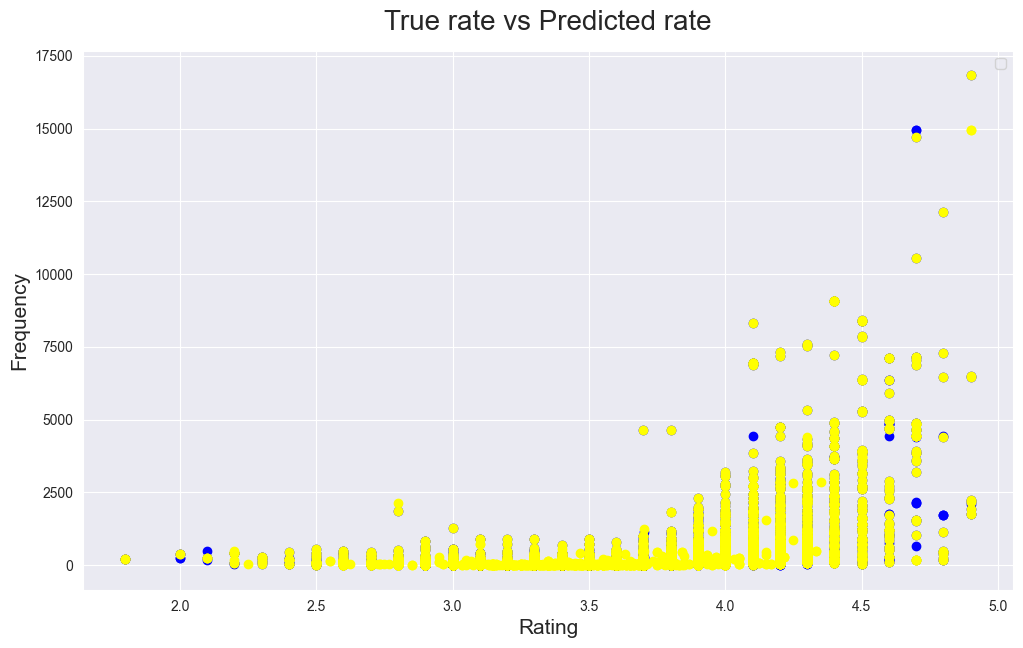

In [65]:
#plotting the Random forest values predicated Rating

plt.figure(figsize=(12,7))

plt.scatter(y_test,x_test.iloc[:,2],color="blue")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(dtree_pred,x_test.iloc[:,2],color="yellow")
plt.legend()

In [66]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(x_train, y_train)

RandomForestRegressor()

In [67]:
rf_pred = random_forest_regressor.predict(x_test)

In [68]:
r2 = r2_score(y_test,rf_pred)
print('R-Square Score: ',r2*100)

# Calculate the absolute errors
rf_errors = abs(rf_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rf_pred), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (rf_errors / y_test)
# Calculate and display accuracy
rf_accuracy = 100 - np.mean(mape)
print('Accuracy for random forest regressor is :', round(rf_accuracy, 2), '%.')

R-Square Score:  89.71454232634653
Mean Absolute Error: 3.7 degrees.
Accuracy for random forest regressor is : 98.47 %.


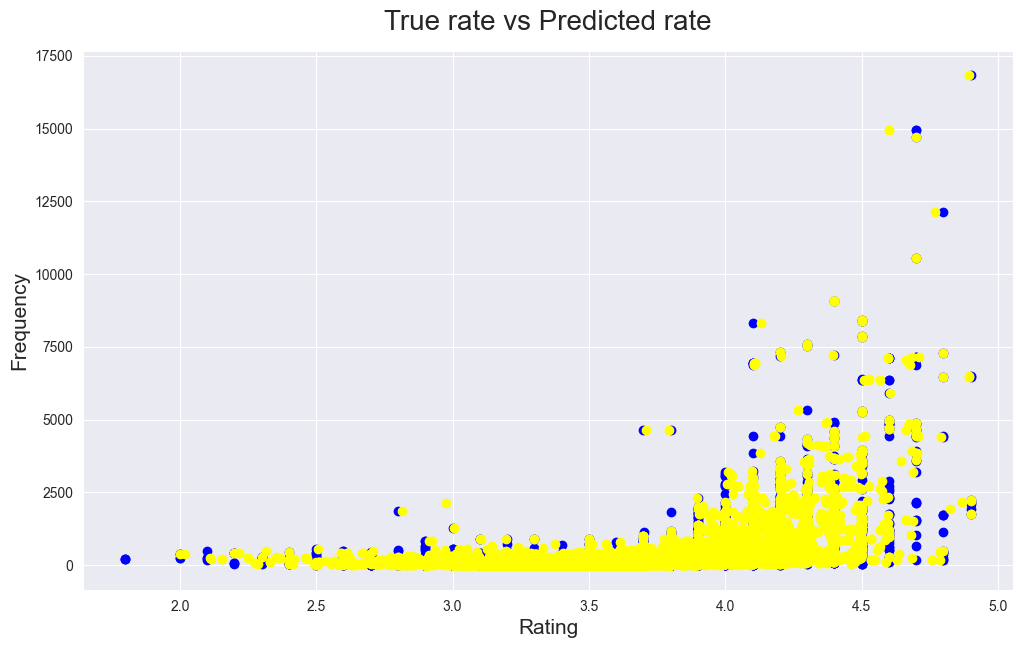

In [69]:
#plotting the Random forest values predicated Rating

plt.figure(figsize=(12,7))

plt.scatter(y_test,x_test.iloc[:,2],color="blue")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(rf_pred,x_test.iloc[:,2],color="yellow")